In [14]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

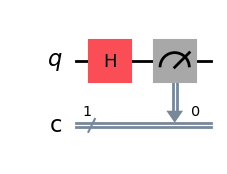

In [15]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure([0], [0])
display(circuit.draw("mpl"))

In [16]:
backend_sim = AerSimulator()
sampler_sim = BackendSamplerV2(backend=backend_sim)

target = backend_sim.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

sample = 500;
qc_isa = pm.run(circuit)
job = sampler_sim.run([qc_isa],shots=sample)

res = job.result()

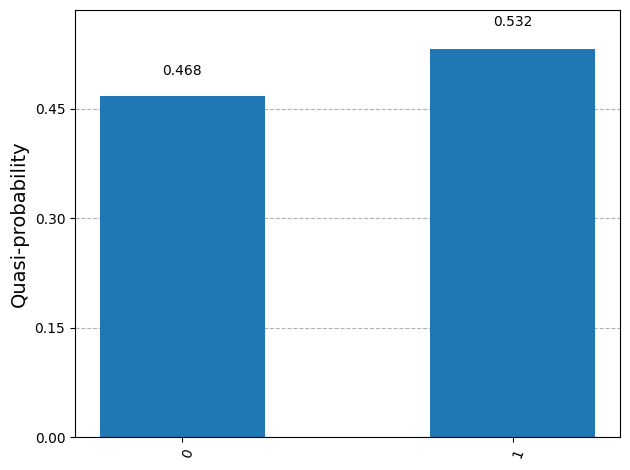

In [ ]:
statistics = res[0].data.c.get_counts()

for key in statistics:
    statistics[key] = float(statistics[key]) / sample
display(plot_histogram(statistics))


In [ ]:
circuit2 = QuantumCircuit(1)
circuit2.h(0)
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit2)

display(v.draw("latex"))

<IPython.core.display.Latex object>